### A script to populate the list of files in a specific class given that they're in a seperate folder

In [1]:
from pathlib import Path

def populate(path, train_images, labels, label):
    directory = Path(path)
    # Loop through all files in the directory
    i = 0
    for file in directory.glob("*.jpg"):
        train_images.append(path + "/" + file.name)
        labels.append(label)
        i += 1

### populating our training lists

In [2]:
PLATE = 1
NO_PLATE = 0

train_images = []
train_labels = []

populate("plate", train_images, train_labels, PLATE)
populate("no-plate", train_images, train_labels, NO_PLATE)

### extract the hog features

In [3]:
import cv2
from skimage.feature import hog

hog_features = []
for img_path in train_images:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=0.5, fy=0.5)
    features = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), block_norm='L2-Hys',
                   transform_sqrt=True, feature_vector=True)
    hog_features.append(features)

### train the model and check accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, train_labels, test_size=0.2, random_state=42)

# Train the SVM model on the training set
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the SVM model on the testing set
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8928571428571429


### print confusion matrix

In [5]:
from sklearn.metrics import confusion_matrix
import numpy as np

predicted_labels = svm_model.predict(X_test)
# Compute the confusion matrix
confusion = confusion_matrix(y_test, predicted_labels)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion)


Confusion matrix:
[[22  1]
 [ 2  3]]


### plot the confusion matrix

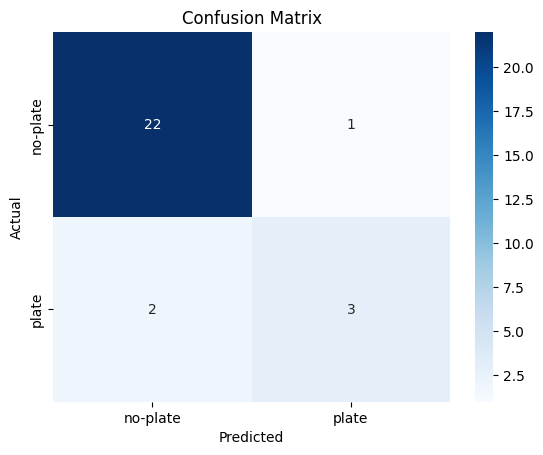

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert confusion matrix to pandas dataframe
cm_df = pd.DataFrame(confusion, index=['no-plate', 'plate'], columns=['no-plate', 'plate'])

# Plot confusion matrix using seaborn heatmap
sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()

#### Save the model to disk

In [8]:
import joblib

joblib.dump(svm_model, 'is_plate.joblib')

['is_plate.joblib']